In [420]:
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import Imputer
from sklearn.cluster import KMeans
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [2]:
def right(val, length):
    return "                                        "[:(length - len(str(val)))] + str(val)

In [3]:
df = pd.read_csv('data/data.csv',skiprows=1, index_col='ID')
df.rename(columns={'default payment next month' : 'DEFAULT'},inplace=True)
X = df.copy().drop(['DEFAULT'], axis=1)
y = df.copy()['DEFAULT']

In [4]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
X.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [6]:
y.shape

(30000,)

In [7]:
X.shape

(30000, 23)

## Numeric Features

In [8]:
num_cols = X._get_numeric_data().columns
print(num_cols)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


## Categorical Features

In [9]:
cat_cols = list(set(X.columns) - set(num_cols))
print(cat_cols)

[]


## Unique Values

In [10]:
print("Unique Values for each feature ")
print("{} - {}".format(right("Feature", 15), "Unique Values"))
print("--------------------------------")
probably_categorical_cols = list()
for col in num_cols:
#     pass
    uniqueVal = X[col].nunique()
    valuesToPrint = ''
    if(uniqueVal) < 10:
        valuesToPrint = X[col].unique()
        probably_categorical_cols.append(col)
    print('{} - {}, {}'.format(right(col,15), X[col].nunique(), valuesToPrint))

Unique Values for each feature 
        Feature - Unique Values
--------------------------------
      LIMIT_BAL - 81, 
            SEX - 2, [2 1]
      EDUCATION - 7, [2 1 3 5 4 6 0]
       MARRIAGE - 4, [1 2 3 0]
            AGE - 56, 
          PAY_0 - 11, 
          PAY_2 - 11, 
          PAY_3 - 11, 
          PAY_4 - 11, 
          PAY_5 - 10, 
          PAY_6 - 10, 
      BILL_AMT1 - 22723, 
      BILL_AMT2 - 22346, 
      BILL_AMT3 - 22026, 
      BILL_AMT4 - 21548, 
      BILL_AMT5 - 21010, 
      BILL_AMT6 - 20604, 
       PAY_AMT1 - 7943, 
       PAY_AMT2 - 7899, 
       PAY_AMT3 - 7518, 
       PAY_AMT4 - 6937, 
       PAY_AMT5 - 6897, 
       PAY_AMT6 - 6939, 


In [11]:
probably_categorical_cols

['SEX', 'EDUCATION', 'MARRIAGE']

## Value counts for probably categorical columns

In [12]:
print("Value counts for each probable categorical column ")
# print("{} - {}".format(right("Feature", 15), "Unique Values"))
print("--------------------------------")
for col in probably_categorical_cols:
    print(X[col].value_counts())
    print("-----------------------------")
    
print(X.AGE.value_counts())
print("-----------------------------")


Value counts for each probable categorical column 
--------------------------------
2    18112
1    11888
Name: SEX, dtype: int64
-----------------------------
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
-----------------------------
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
-----------------------------
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74    

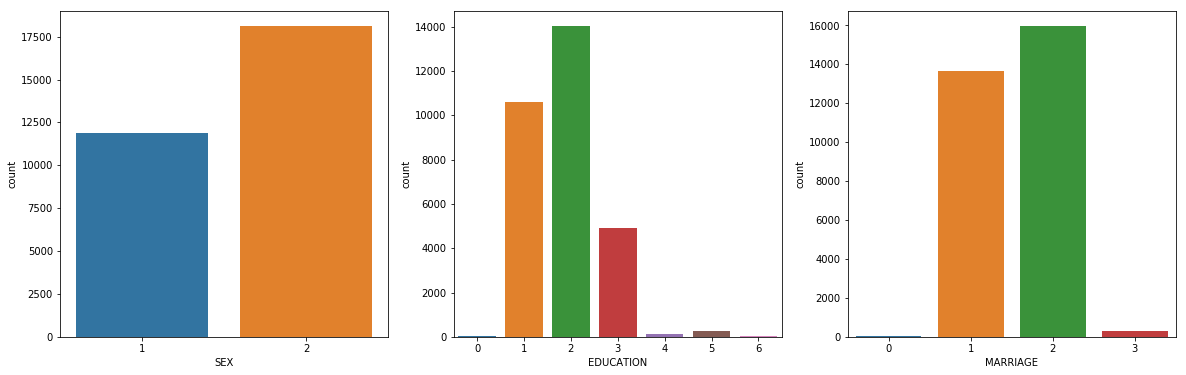

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.countplot(x=X.SEX)
plt.subplot(132)
sns.countplot('EDUCATION', data=X)
plt.subplot(133)
sns.countplot('MARRIAGE', data=X)

## Target classes

In [14]:
print("Total classes - {}".format(y.nunique()))

print(y.value_counts())

Total classes - 2
0    23364
1     6636
Name: DEFAULT, dtype: int64


## Null Values

In [15]:
print("Null Values for each feature ")
print("{} - {}".format(right("Feature", 15), "Null Values"))
print("--------------------------------")
for col in num_cols:
#     pass
    print('{} - {}'.format(right(col,15), X[col].isnull().sum()))

Null Values for each feature 
        Feature - Null Values
--------------------------------
      LIMIT_BAL - 0
            SEX - 0
      EDUCATION - 0
       MARRIAGE - 0
            AGE - 0
          PAY_0 - 0
          PAY_2 - 0
          PAY_3 - 0
          PAY_4 - 0
          PAY_5 - 0
          PAY_6 - 0
      BILL_AMT1 - 0
      BILL_AMT2 - 0
      BILL_AMT3 - 0
      BILL_AMT4 - 0
      BILL_AMT5 - 0
      BILL_AMT6 - 0
       PAY_AMT1 - 0
       PAY_AMT2 - 0
       PAY_AMT3 - 0
       PAY_AMT4 - 0
       PAY_AMT5 - 0
       PAY_AMT6 - 0


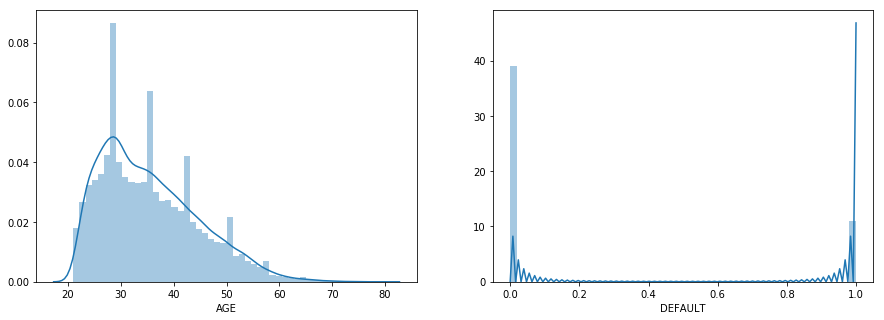

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(X.AGE)
plt.subplot(122)
sns.distplot(y)

## Plotting Bill amounts

In [17]:
cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

for col in cols:
    print("Feature - " + col)
    print("Min - {}".format(X[col].min()))
    print("Max - {}".format(X[col].max()))

Feature - BILL_AMT1
Min - -165580
Max - 964511
Feature - BILL_AMT2
Min - -69777
Max - 983931
Feature - BILL_AMT3
Min - -157264
Max - 1664089
Feature - BILL_AMT4
Min - -170000
Max - 891586
Feature - BILL_AMT5
Min - -81334
Max - 927171
Feature - BILL_AMT6
Min - -339603
Max - 961664


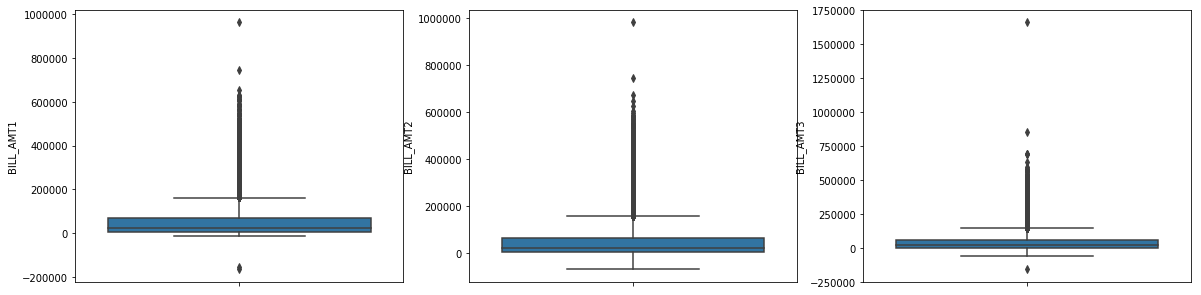

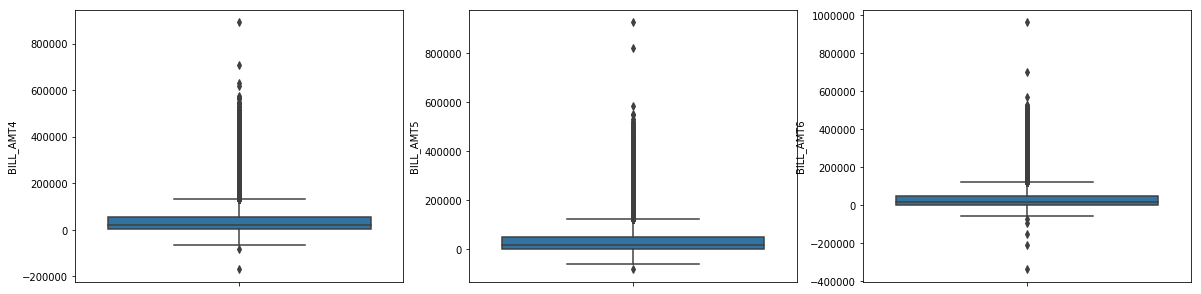

In [18]:
cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3']
plt.figure(figsize=(20,5))
start = int('1' + str(len(cols)) + '1')
for col in cols:
    plt.subplot(start)
    sns.boxplot(None,col, data=X)
    start += 1
cols = ['BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize=(20,5))
start = int('1' + str(len(cols)) + '1')
for col in cols:
    plt.subplot(start)
    sns.boxplot(None,col, data=X)
    start += 1


## Plotting Pay amounts

In [21]:
cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

for col in cols:
    print("Feature - " + col)
    print("Min - {}".format(X[col].min()))
    print("Max - {}".format(X[col].max()))

Feature - PAY_AMT1
Min - 0
Max - 873552
Feature - PAY_AMT2
Min - 0
Max - 1684259
Feature - PAY_AMT3
Min - 0
Max - 896040
Feature - PAY_AMT4
Min - 0
Max - 621000
Feature - PAY_AMT5
Min - 0
Max - 426529
Feature - PAY_AMT6
Min - 0
Max - 528666


## Correlation

In [22]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

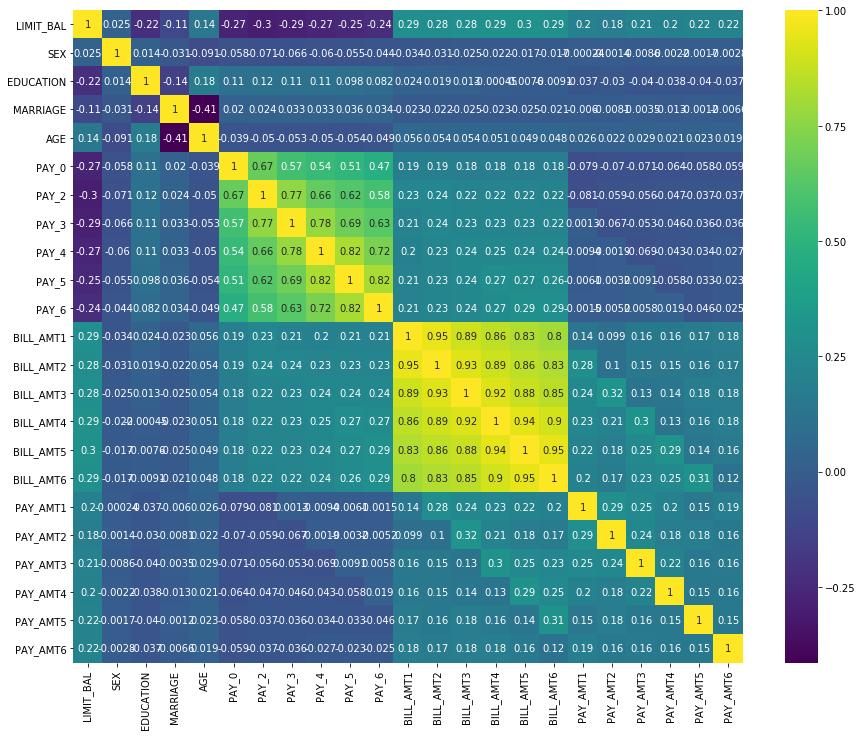

In [23]:
df_corr = X[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(), cmap='viridis', annot=True)

In [22]:
# sns.pairplot(X)

In [24]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

In [25]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [26]:
pay_amount_cols = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [27]:
bill_cols.reverse()
pay_amount_cols.reverse()
pay_cols.reverse()

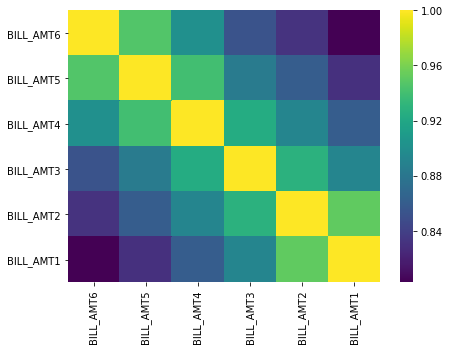

In [28]:
plt.figure(figsize=(7,5))
sns.heatmap(X[bill_cols].corr(),cmap='viridis')

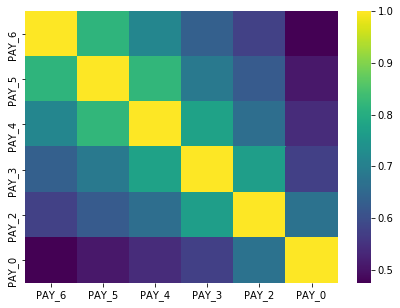

In [29]:
plt.figure(figsize=(7,5))
sns.heatmap(X[pay_cols].corr(),cmap='viridis')

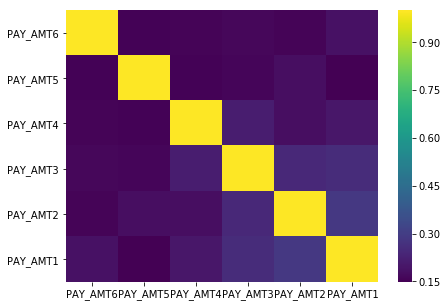

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(X[pay_amount_cols].corr(),cmap='viridis')

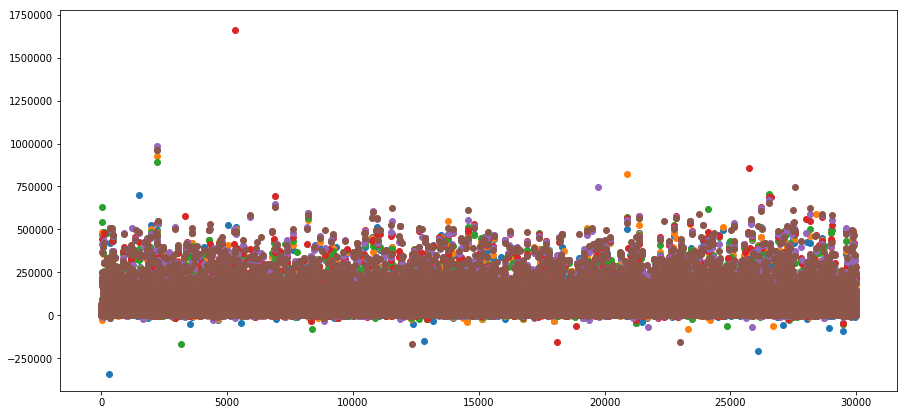

In [31]:
plt.figure(figsize=(15,7))
for col in bill_cols:
    plt.scatter(X.index, X[col])

## -ve Bill amount data points

In [32]:
print("Negative Values")
for col in bill_cols:
    print(col, X[X[col] < 0].shape)



Negative Values
BILL_AMT6 (688, 23)
BILL_AMT5 (655, 23)
BILL_AMT4 (675, 23)
BILL_AMT3 (655, 23)
BILL_AMT2 (669, 23)
BILL_AMT1 (590, 23)


In [33]:
X[X['BILL_AMT1'] < 0]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
27,60000,1,1,2,27,1,-2,-1,-1,-1,...,259,-57,127,-189,0,1000,0,500,0,1000
69,130000,2,3,2,29,1,-2,-2,-1,2,...,-9850,10311,10161,7319,0,0,20161,0,7319,13899
93,100000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,7555,0,0,0,0,0
102,380000,2,1,2,30,-2,-2,-1,0,0,...,32475,32891,33564,34056,223,33178,1171,1197,1250,5000
110,360000,1,2,1,35,1,-2,-2,-2,-2,...,-103,-103,-103,-103,0,0,0,0,0,0
150,260000,2,1,1,60,1,-2,-1,-1,-1,...,21400,0,969,869,0,22500,0,969,1000,0
174,50000,2,1,2,24,1,-2,-2,-2,-2,...,-709,-2898,-3272,-3272,0,0,0,0,0,0
217,240000,2,2,1,36,1,-2,-2,-2,-2,...,-946,-946,-946,-946,0,0,0,0,0,0
320,180000,1,2,2,29,1,-2,-2,-2,-2,...,-2,-2,-2,-2,0,0,0,0,0,0


## Checking for outliers using clustering

In [34]:
kmeanModel = KMeans(n_clusters=20)
kmeanModel.fit(X)
# distortions_1.append(kmeanModel.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
cluster_labels = pd.Series(np.array(kmeanModel.labels_))
cluster_df = X.copy()
cluster_df['clabel'] = cluster_labels
pd.Series(np.array(kmeanModel.labels_)).value_counts()

7     5772
10    4183
3     3143
6     3119
1     2350
0     1837
17    1650
9     1564
16    1166
14    1135
4      857
18     796
2      628
19     463
11     461
5      282
13     250
15     245
8       95
12       4
dtype: int64

In [37]:
cluster_df[cluster_df.clabel == 12]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,clabel
ID,,,,,,,,,,,,,,,,,,,,,
5296,520000,1,1,2,34,0,0,0,0,0,...,13178,17059,17528,5014,5010,13009,10035,10007,5025,12.0
25731,20000,2,3,2,41,0,0,2,0,0,...,19897,19895,20313,3000,0,1311,699,725,711,12.0
28003,230000,2,1,2,29,2,-1,-1,-1,-1,...,711,711,291,711,711,711,711,291,1131,12.0
28716,780000,2,2,2,41,-2,-2,-2,-2,-2,...,21482,72628,182792,62819,39558,22204,82097,184322,25695,12.0


In [38]:
full_pay = bill_cols + pay_amount_cols + pay_cols

cluster_df[full_pay]

,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0
ID,,,,,,,,,,,,,,,,,,
1,0,0,0,689,3102,3913,0,0,0,0,689,0,-2,-2,-1,-1,2,2
2,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000,0,2,0,0,0,2,-1
3,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500,1518,0,0,0,0,0,0
4,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019,2000,0,0,0,0,0,0
5,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681,2000,0,0,0,-1,0,-1
6,20024,19619,19394,57608,57069,64400,800,1000,1000,657,1815,2500,0,0,0,0,0,0
7,473944,483003,542653,445007,412023,367965,13770,13750,20239,38000,40000,55000,0,0,0,0,0,0
8,567,-159,221,601,380,11876,1542,1687,581,0,601,380,-1,0,0,-1,-1,0
9,3719,11793,12211,12108,14096,11285,1000,1000,1000,432,0,3329,0,0,0,2,0,0


In [39]:
y[25731]

0

In [40]:
cross_tab = pd.crosstab(index=X.MARRIAGE, columns=y)

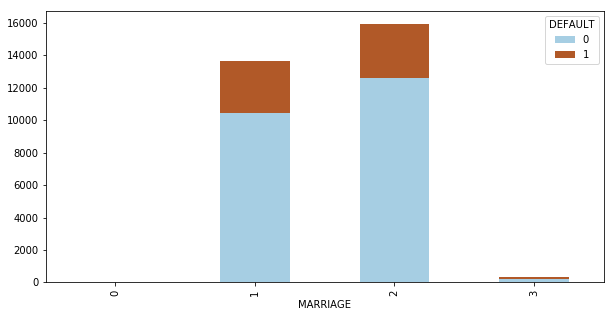

In [41]:
cross_tab.plot(kind='bar', figsize=(10,5), stacked=True, colormap='Paired')

In [42]:
cross_tab


DEFAULT,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


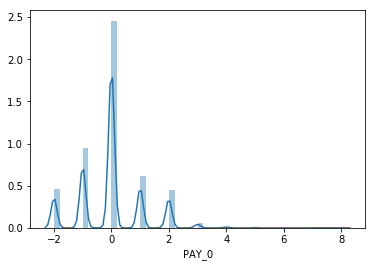

In [43]:
sns.distplot(X.PAY_0)

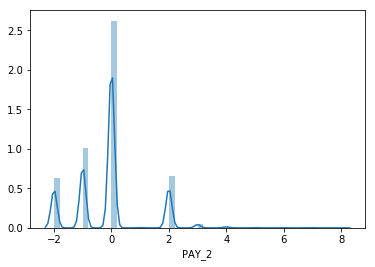

In [44]:
sns.distplot(X.PAY_2)

## Ratio between Bill and payments

In [45]:
def get_ratio(df_):
    df = pd.DataFrame(df_)
    for month in range(6,1,-1):
        pay_amt = 'PAY_AMT{}'.format(month-1)
        bill_amt = 'BILL_AMT{}'.format(month)
        ratio = 'RATIO{}'.format(month)
        df[ratio] = (df[pay_amt]/df[bill_amt])
        df.loc[df[bill_amt] <= 0,ratio] = np.inf
    return df

In [46]:
ratio_cols = ['RATIO2','RATIO3','RATIO4','RATIO5','RATIO6']
ratio_cols.reverse()

In [47]:
ratio_df = get_ratio(X)

In [430]:
ratio_df[ratio_cols].head()

,RATIO6,RATIO5,RATIO4,RATIO3,RATIO2
ID,,,,,
1,690.655172,129.705128,4444.333333,1.000000,0.000000
2,0.000000,0.289436,0.305623,0.372856,0.000000
3,0.064313,0.066899,0.069779,0.110628,0.108220
4,0.036180,0.037985,0.042382,0.040961,0.041465
5,0.036015,0.470072,0.477555,1.023608,0.352734


### Should we remove the ratio outliers ??

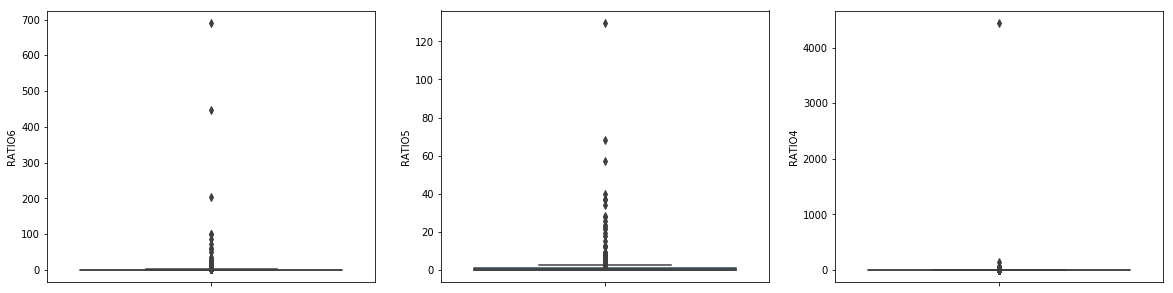

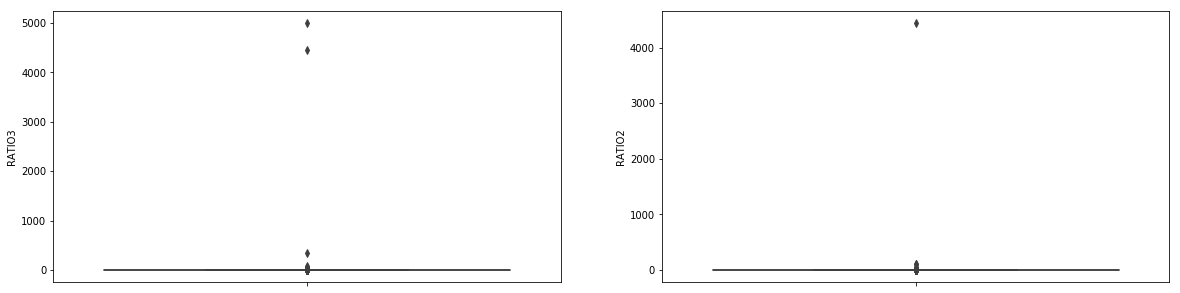

In [50]:
cols = ['RATIO6','RATIO5','RATIO4']
plt.figure(figsize=(20,5))
start = int('1' + str(len(cols)) + '1')
for col in cols:
    plt.subplot(start)
    sns.boxplot(None,col, data=X)
    start += 1
cols = ['RATIO3','RATIO2']
plt.figure(figsize=(20,5))
start = int('1' + str(len(cols)) + '1')
for col in cols:
    plt.subplot(start)
    sns.boxplot(None,col, data=X)
    start += 1


## Imputation

Strategy 
1. Impute Inf to Max of (max ratio or 1). That is -  Person paid even if there was no bill
2. Impute negative to Max of (max ratio or 1). That is - the bill amount was -ve but person still paid something

In [51]:
for col in ratio_cols:
    print(ratio_df[col].isnull().sum())

0
0
0
0
0


In [52]:
for col in ratio_cols:
    ratio_df[col].replace(np.nan, 1, inplace=True)

In [53]:
for col in ratio_cols:
    print(np.sum( ratio_df[col] == np.inf) )

4708
4161
3870
3525
3175


In [57]:
ratio_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RATIO6,RATIO5,RATIO4,RATIO3,RATIO2
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,108.742465,18.290690,573.773088,588.267499,470.832437
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,251.119416,44.725956,1489.811735,1610.651914,1367.285356
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.038092,0.036397,0.037923,0.044607,0.044674
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.090388,0.076952,0.084352,0.103755,0.101535
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,690.655172,129.705128,4444.333333,5001.000000,4444.333333


In [55]:
for col in ratio_cols:
#     mx = max(1.0, ratio_df[col].max())
    ratio_df[col].replace(np.inf, np.nan, inplace=True)

In [56]:
for col in ratio_cols:
    print(ratio_df[col].max())
    mx = ratio_df[col].max()
    ratio_df[col].replace(np.nan, mx, inplace=True)

690.6551724137931
129.7051282051282
4444.333333333333
5001.0
4444.333333333333


In [58]:
ratio_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RATIO6,RATIO5,RATIO4,RATIO3,RATIO2
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,108.742465,18.290690,573.773088,588.267499,470.832437
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,251.119416,44.725956,1489.811735,1610.651914,1367.285356
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.038092,0.036397,0.037923,0.044607,0.044674
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.090388,0.076952,0.084352,0.103755,0.101535
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,690.655172,129.705128,4444.333333,5001.000000,4444.333333


## Marriage, Education

In [59]:
marriage_mode = ratio_df.MARRIAGE.mode()[0]
edu_mode = ratio_df.EDUCATION.mode()[0]
print(marriage_mode)
print(edu_mode)
ratio_df.MARRIAGE.replace(0, marriage_mode, inplace=True)
ratio_df.EDUCATION.replace(0, edu_mode, inplace=True)

2
2


## One hot encode

In [60]:
ratio_df['SEX'] = ratio_df['SEX'].astype('category')
ratio_df['MARRIAGE'] = ratio_df['MARRIAGE'].astype('category')
ratio_df['EDUCATION'] = ratio_df['EDUCATION'].astype('category')

In [61]:
encoded_df = pd.get_dummies(ratio_df, drop_first=True)
# encoded_df = pd.concat([ratio_df, one_hot_encode],axis=1)

In [62]:
# encoded_df.drop(labels=['SEX', 'EDUCATION','MARRIAGE'], inplace=True, axis=1)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 33 columns):
LIMIT_BAL      30000 non-null int64
AGE            30000 non-null int64
PAY_0          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
RATIO6         30000 non-null float64
RATIO5         30000 non-null float64
RATIO4         30000 non-null float64
RATIO3         30000 non-null float64
RATIO2         3000

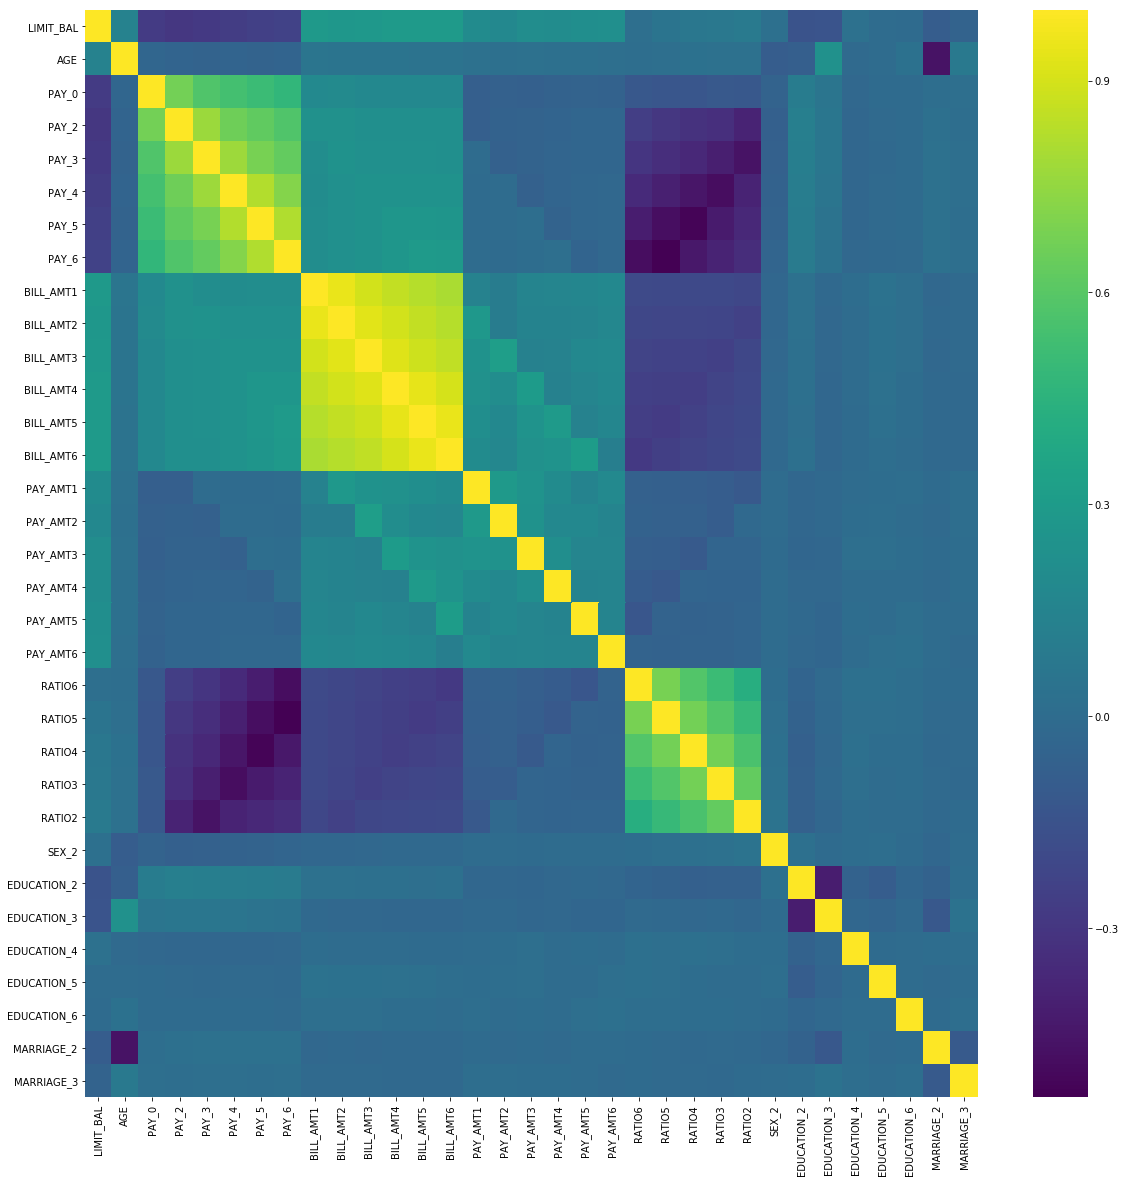

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(encoded_df.corr(), cmap='viridis')

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca_cols = bill_cols + pay_amount_cols + ratio_cols

In [66]:
pca = PCA()

principalComponents = pca.fit_transform(encoded_df[pca_cols])
principalDf = pd.DataFrame(data = principalComponents)

In [431]:
pca_cols

['BILL_AMT6',
 'BILL_AMT5',
 'BILL_AMT4',
 'BILL_AMT3',
 'BILL_AMT2',
 'BILL_AMT1',
 'PAY_AMT6',
 'PAY_AMT5',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT2',
 'PAY_AMT1',
 'RATIO6',
 'RATIO5',
 'RATIO4',
 'RATIO3',
 'RATIO2']

In [67]:
def doPCA(df, pca_cols, threshold):
    pca = PCA()
    principalComponents = pca.fit_transform(df[pca_cols])
    principalDf = pd.DataFrame(data = principalComponents)
    sm = 0
    cols = list()
    a = ((pca.explained_variance_ * 100.0) / pca.explained_variance_.sum())
    for i in range(len(a)):
        sm += a[i]
        cols.append(i)
        print(i, sm)
        if(sm > threshold):
            break
    return principalDf.iloc[:,cols]


In [68]:
pca_df = doPCA(encoded_df, pca_cols, 95)

0 84.85143505128202
1 89.7216345283982
2 92.42966604981976
3 94.03553887387395
4 95.47703150574846


In [69]:
pca_df

,0,1,2,3,4
1,-107833.361126,-3037.008060,-2540.050380,-5196.635869,771.636119
2,-104303.944627,2236.920289,-2164.102088,-5043.704437,-181.401274
3,-69244.856603,-3941.391401,-6137.910616,719.720241,1289.263034
4,-15279.069675,-12497.947719,2098.066842,-7443.917905,6516.394133
5,-65850.494869,22837.055239,32159.935537,62.419259,7331.696470
6,-10407.988282,-36881.846531,7139.988120,-3767.182107,10754.901547
7,991334.946879,202802.008075,-15763.779501,-45584.665551,-45114.026171
8,-105193.714903,-5910.840781,-3856.994454,-1326.276256,1815.231388
9,-84128.104912,-1805.012412,-555.215558,-7051.997969,-3605.616814
10,-101299.340280,13814.552016,-9863.086795,1008.883412,7391.249231


In [70]:
after_pca_df = pd.concat([pca_df, encoded_df.drop(pca_cols, axis=1)], axis = 1)  
# finalDf = pd.concat([principalDf, df[[]]], axis = 1)

In [71]:
after_pca_df

,0,1,2,3,4,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,...,PAY_5,PAY_6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_2,MARRIAGE_3
1,-107833.361126,-3037.008060,-2540.050380,-5196.635869,771.636119,20000,24,2,2,-1,...,-2,-2,1,1,0,0,0,0,0,0
2,-104303.944627,2236.920289,-2164.102088,-5043.704437,-181.401274,120000,26,-1,2,0,...,0,2,1,1,0,0,0,0,1,0
3,-69244.856603,-3941.391401,-6137.910616,719.720241,1289.263034,90000,34,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-15279.069675,-12497.947719,2098.066842,-7443.917905,6516.394133,50000,37,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5,-65850.494869,22837.055239,32159.935537,62.419259,7331.696470,50000,57,-1,0,-1,...,0,0,0,1,0,0,0,0,0,0
6,-10407.988282,-36881.846531,7139.988120,-3767.182107,10754.901547,50000,37,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,991334.946879,202802.008075,-15763.779501,-45584.665551,-45114.026171,500000,29,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,-105193.714903,-5910.840781,-3856.994454,-1326.276256,1815.231388,100000,23,0,-1,-1,...,0,-1,1,1,0,0,0,0,1,0
9,-84128.104912,-1805.012412,-555.215558,-7051.997969,-3605.616814,140000,28,0,0,2,...,0,0,1,0,1,0,0,0,0,0
10,-101299.340280,13814.552016,-9863.086795,1008.883412,7391.249231,20000,35,-2,-2,-2,...,-1,-1,0,0,1,0,0,0,1,0


# Now we can begin EDA, hopefully!!

We already handled missing values.

We did encoding for categrorical features

We added new features for ratio

We did PCA for dimensionality reduction

Now we can transform.... 

In [72]:
count_cols = after_pca_df.shape[1]

# columns = after_pca_df.columns[i]
# sns.distplot(after_pca_df[columns])

In [73]:
count_cols

21

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3
4 1
4 2
4 3
5 1
5 2
5 3
6 1
6 2
6 3
7 1
7 2
7 3


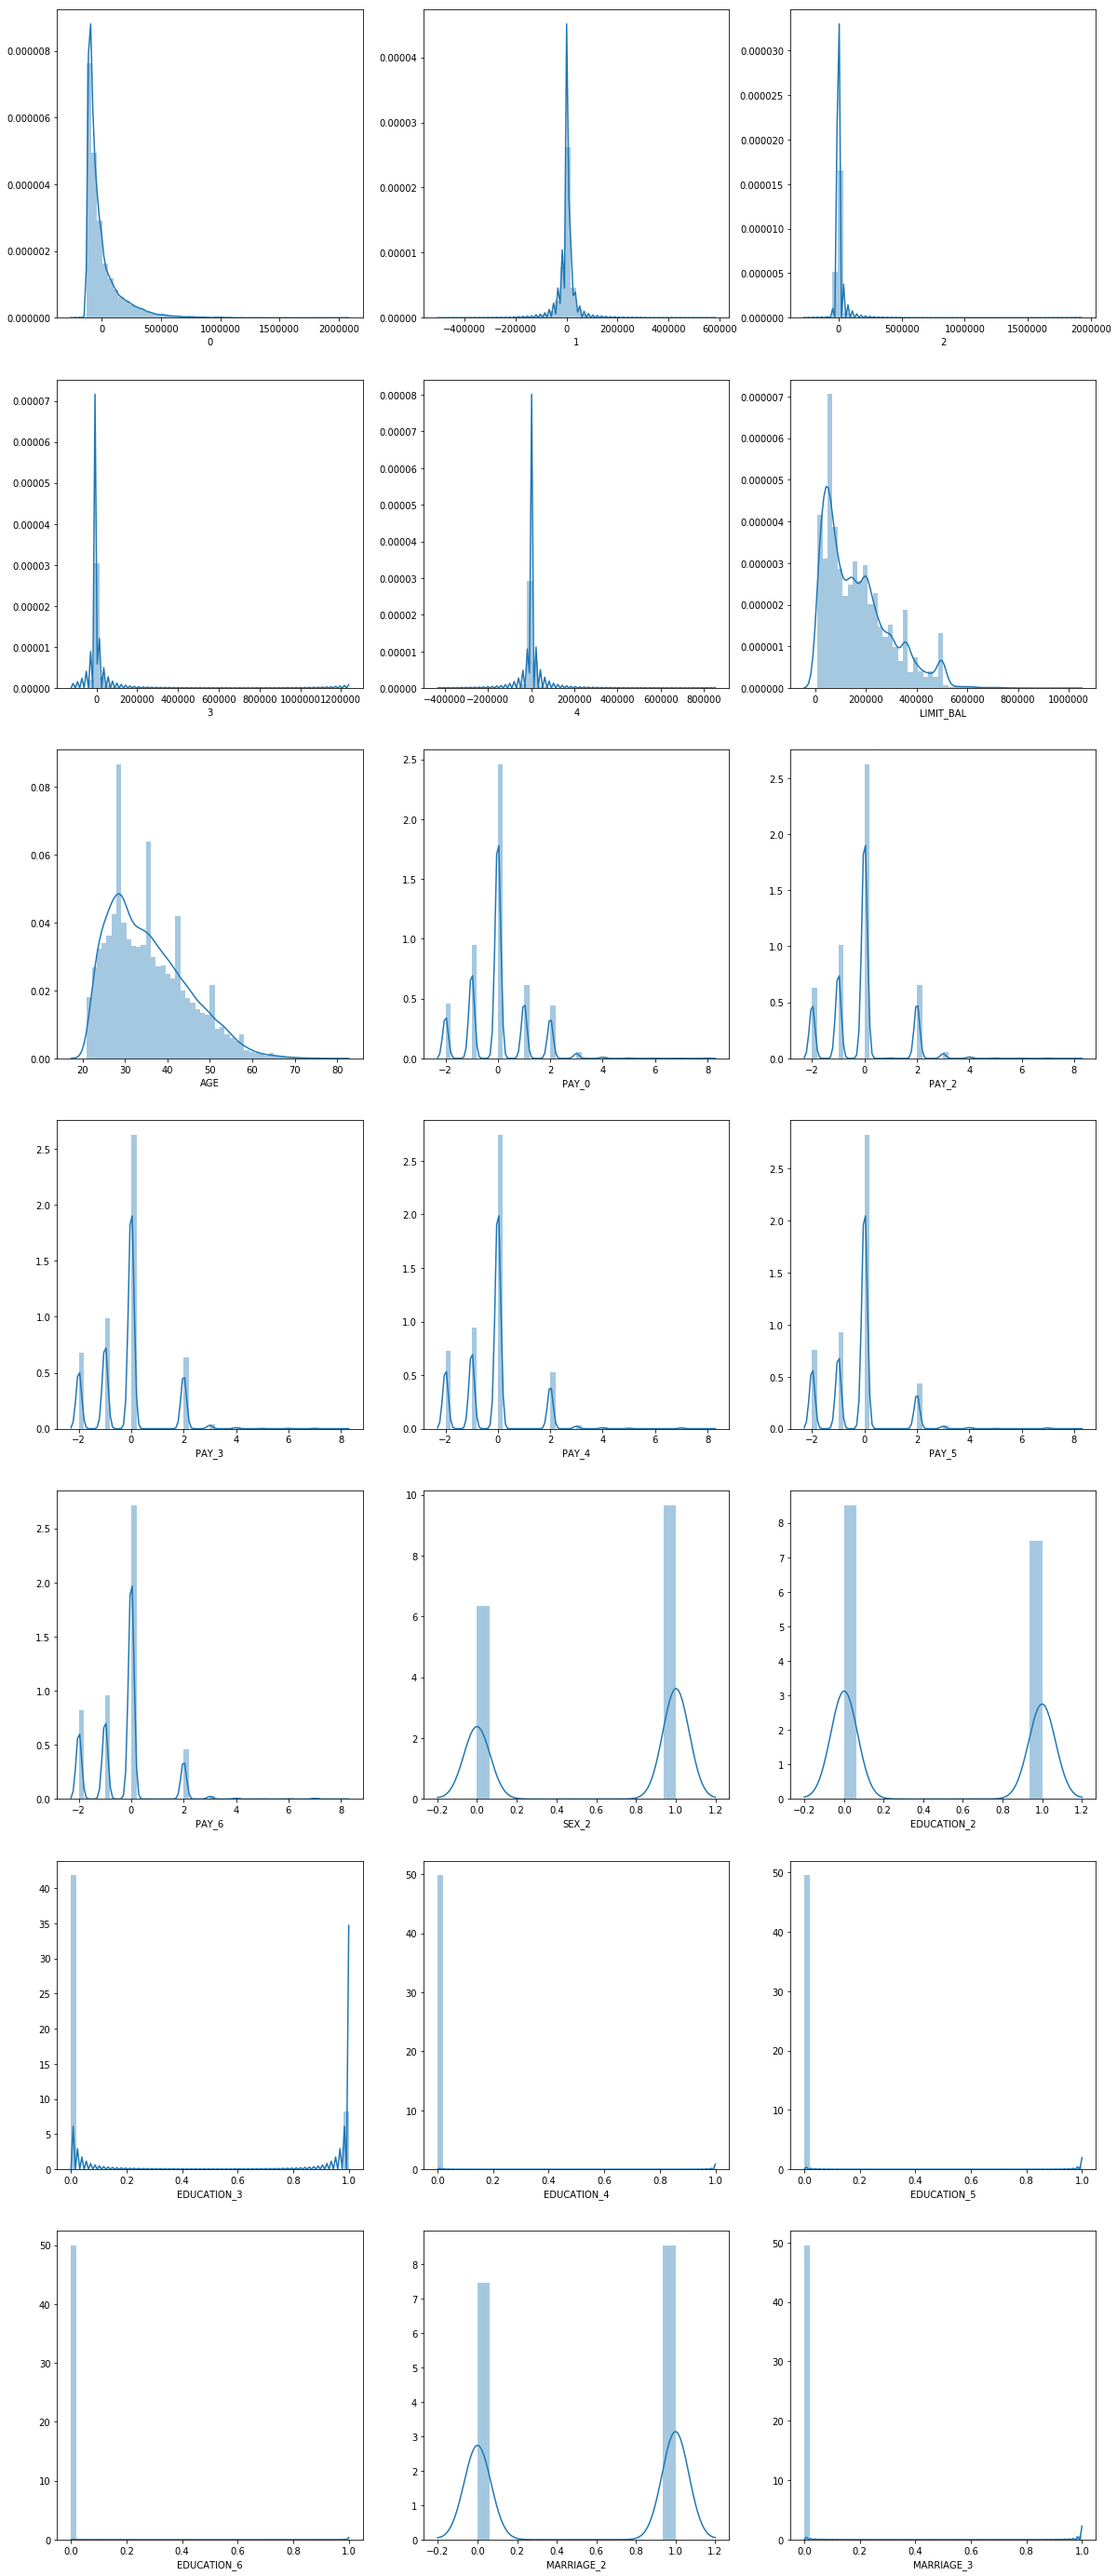

In [74]:
cnt = 0
plt.figure(figsize=(20,50))
for i in range(1,8):
    for j in range(1,4):
        plt.subplot(7,3,(j)+(3*(i-1)) )
        sns.distplot(after_pca_df.iloc[:,cnt])
        cnt += 1
        print(i,j)

## cols to transform - 0, LIMIT_BAL, AGE

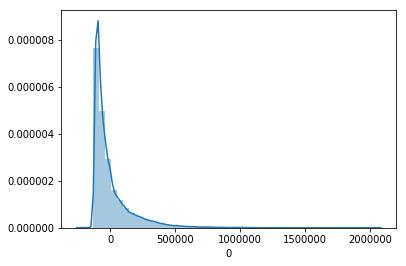

In [75]:
min_val = after_pca_df.iloc[:,0].min()
# after_pca_df.iloc[:,0] - min_val + 1
# print(after_pca_df.iloc[:,0] - min_val)
# np.log(after_pca_df.iloc[:,0] - min_val + 1)
# sns.distplot(np.log(after_pca_df.iloc[:,0] - min_val + 1))
sns.distplot(after_pca_df.iloc[:,0])

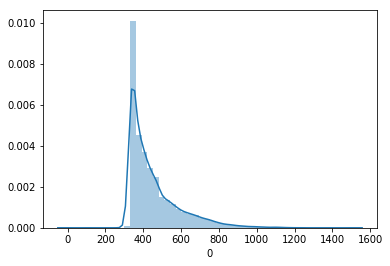

In [198]:
sns.distplot(np.sqrt(after_pca_df.iloc[:,0] - min_val))

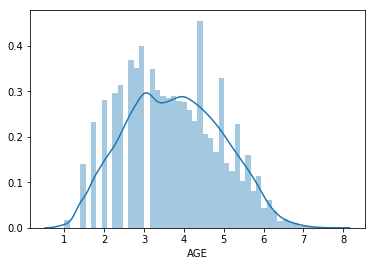

In [80]:
min_val = after_pca_df['AGE'].min()
sns.distplot(np.sqrt(after_pca_df['AGE'] - min_val + 1))

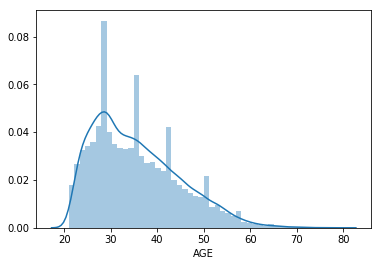

In [79]:
sns.distplot(after_pca_df['AGE'])

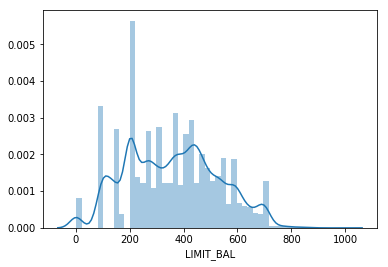

In [84]:
min_val = after_pca_df['LIMIT_BAL'].min()
sns.distplot(np.sqrt(after_pca_df['LIMIT_BAL'] - min_val + 1))

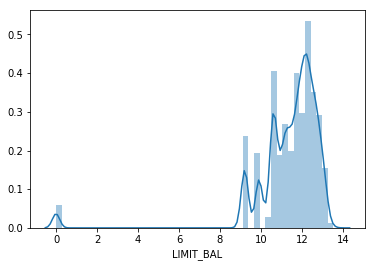

In [86]:
min_val = after_pca_df['LIMIT_BAL'].min()
sns.distplot(np.log(after_pca_df['LIMIT_BAL'] - min_val + 1))

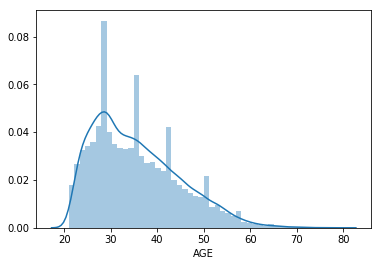

In [81]:
sns.distplot(after_pca_df['AGE'])

In [183]:
after_pca_df.describe()

,0,1,2,3,4,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,...,PAY_5,PAY_6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_2,MARRIAGE_3
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-3.725290e-12,3.740812e-12,3.352761e-12,-2.219652e-12,1.521160e-12,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,...,-0.266200,-0.291100,0.603733,0.468133,0.163900,0.004100,0.009333,0.001700,0.533933,0.010767
std,1.557690e+05,3.731856e+04,2.782777e+04,2.142926e+04,2.030289e+04,129747.661567,9.217904,1.123802,1.197186,1.196868,...,1.133187,1.149988,0.489129,0.498992,0.370191,0.063901,0.096159,0.041197,0.498856,0.103204
min,-2.224205e+05,-5.014429e+05,-2.707044e+05,-1.223400e+05,-4.320034e+05,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.897906e+04,-6.611547e+03,-6.339701e+03,-7.466225e+03,-1.759730e+03,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.876045e+04,1.202289e+03,-2.547341e+03,-5.301296e+03,6.282570e+02,140000.000000,34.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.017570e+04,9.633343e+03,2.154043e+03,9.568257e+02,3.448506e+03,240000.000000,41.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.045960e+06,5.790442e+05,1.928740e+06,1.235574e+06,8.518075e+05,1000000.000000,79.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


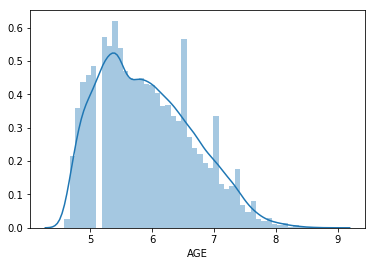

In [95]:
sns.distplot(after_pca_df['AGE'])

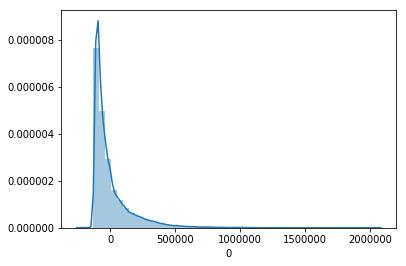

In [195]:
wa = after_pca_df[0]
for i in range(2):
    wa = wa - wa.min() + 1
    wa = np.log(wa)
sns.distplot(after_pca_df[0])


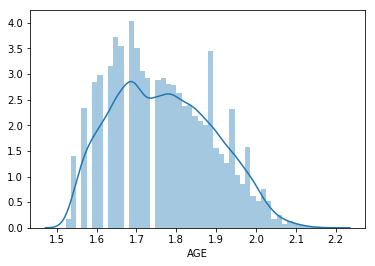

In [97]:
after_pca_df['AGE'] = np.sqrt(after_pca_df['AGE'])
after_pca_df['AGE'] = np.log(after_pca_df['AGE'])
sns.distplot(after_pca_df['AGE'])

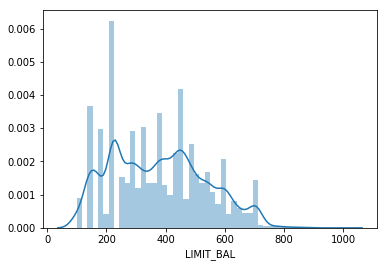

In [102]:
after_pca_df['LIMIT_BAL'] = np.sqrt(after_pca_df['LIMIT_BAL'])
sns.distplot(after_pca_df['LIMIT_BAL'])

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3
4 1
4 2
4 3
5 1
5 2
5 3
6 1
6 2
6 3
7 1
7 2
7 3


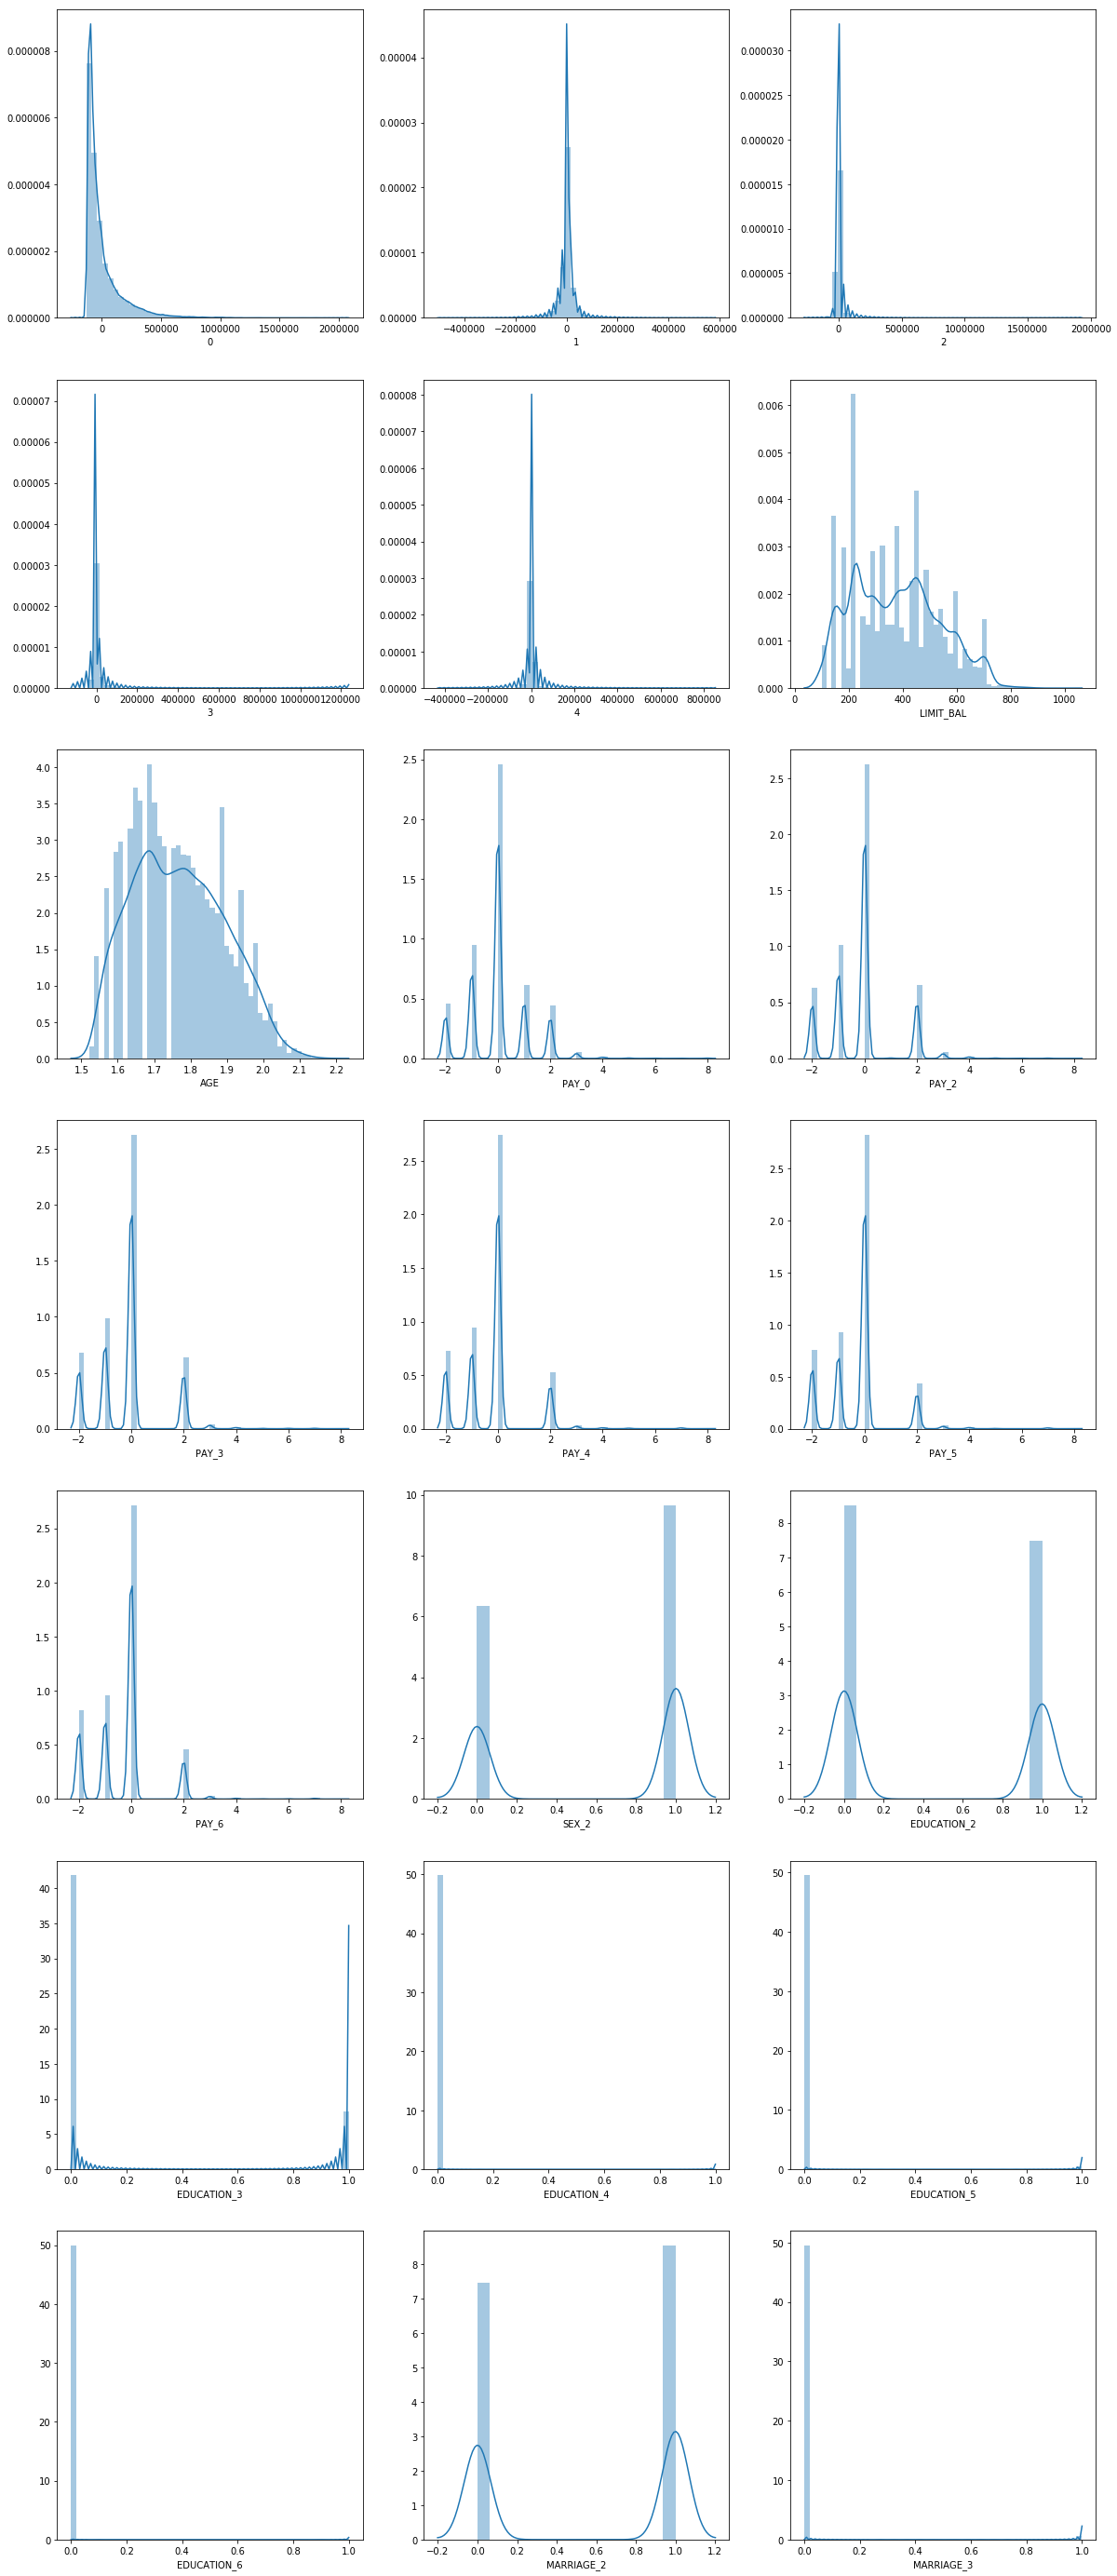

In [103]:
cnt = 0
plt.figure(figsize=(20,50))
for i in range(1,8):
    for j in range(1,4):
        plt.subplot(7,3,(j)+(3*(i-1)) )
        sns.distplot(after_pca_df.iloc[:,cnt])
        cnt += 1
        print(i,j)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(after_pca_df, y)

In [206]:
rus = RandomUnderSampler()
X_under_sample, y_under_sample = rus.fit_sample(X_train, y_train)

ros = RandomOverSampler()
X_over_sample, y_over_sample = ros.fit_sample(X_train, y_train)

sos = SMOTE()
X_sos_sample, y_sos_sample = sos.fit_sample(X_train, y_train)

ada = SMOTE()
X_ada_sample, y_ada_sample = ada.fit_sample(X_train, y_train)

In [207]:
def test_model_extensive(model):
    model_rus = model()
    model_rus.fit(X_under_sample, y_under_sample)
    y_under_pred = model_rus.predict(X_test)
    rus_scores =  (accuracy_score(y_test, y_under_pred), 
                   recall_score(y_test, y_under_pred), 
                   precision_score(y_test, y_under_pred))
    model_ros = model()
    model_ros.fit(X_over_sample, y_over_sample)
    y_over_pred = model_ros.predict(X_test)
    ros_scores =  (accuracy_score(y_test, y_over_pred), 
                   recall_score(y_test, y_over_pred), 
                   precision_score(y_test, y_over_pred))

    model_sos = model()
    model_sos.fit(X_sos_sample, y_sos_sample)
    y_sos_pred = model_sos.predict(X_test)
    sos_scores =  (accuracy_score(y_test, y_sos_pred), 
                   recall_score(y_test, y_sos_pred), 
                   precision_score(y_test, y_sos_pred))

    model_ada = model()
    model_ada.fit(X_ada_sample, y_ada_sample)
    y_ada_pred = model_ada.predict(X_test)
    ada_scores =  (accuracy_score(y_test, y_ada_pred), 
                   recall_score(y_test, y_ada_pred), 
                   precision_score(y_test, y_ada_pred))

    return rus_scores, ros_scores, sos_scores, ada_scores

In [283]:
def test_model(model):
    model_rus = model()
    model_rus.fit(X_under_sample, y_under_sample)
    y_test_pred = model_rus.predict(X_test.as_matrix())
    test_scores = (accuracy_score(y_test, y_test_pred), 
                   recall_score(y_test, y_test_pred), 
                   precision_score(y_test, y_test_pred))

    y_train_pred = model_rus.predict(X_under_sample)
    train_scores = (accuracy_score(y_under_sample, y_train_pred), 
                   recall_score(y_under_sample, y_train_pred), 
                   precision_score(y_under_sample, y_train_pred))
    
    
    return train_scores, test_scores

In [255]:
test_model(LogisticRegression)

((0.6838666666666666, 0.6480079681274901, 0.3782998023025933),
 (0.6708, 0.6379950495049505, 0.3536878216123499))

In [256]:
test_model(DecisionTreeClassifier)

((0.7940888888888888, 0.999601593625498, 0.5200538915949839),
 (0.6253333333333333, 0.6175742574257426, 0.3128526645768025))

In [257]:
test_model(BaggingClassifier)

((0.8605333333333334, 0.9653386454183267, 0.6204865556978233),
 (0.7197333333333333, 0.5761138613861386, 0.3965076660988075))

In [321]:
test_model(RandomForestClassifier)

((0.9804780876494024, 0.9665338645418327, 0.9942622950819672),
 (0.7294666666666667, 0.6014851485148515, 0.412388629613916))

In [259]:
test_model(KNeighborsClassifier)

((0.6521333333333333, 0.7183266932270916, 0.35991615929733506),
 (0.5798666666666666, 0.5835396039603961, 0.27565039462145574))

In [285]:
test_model(AdaBoostClassifier)

((0.7161354581673307, 0.6304780876494024, 0.7608173076923077),
 (0.7566666666666667, 0.625, 0.4531179901301032))

In [252]:
# test_model(GaussianNB)
# OUTPUT
# ((0.3410666666666667, 0.9077970297029703, 0.2343450479233227),
#  (0.6704, 0.504950495049505, 0.3279742765273312))

((0.3410666666666667, 0.9077970297029703, 0.2343450479233227),
 (0.6704, 0.504950495049505, 0.3279742765273312))

In [284]:
test_model(XGBClassifier)

/Users/aditya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/aditya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


((0.7315737051792829, 0.650996015936255, 0.7760626929470434),
 (0.7570666666666667, 0.6336633663366337, 0.45430346051464066))

In [294]:
def test_model_Tuned(model):
    toReturn = list()
    model_rus = model
    model_rus.fit(X_under_sample, y_under_sample)
    y_train_pred = model_rus.predict(X_under_sample)
    rus_scores =  (accuracy_score(y_under_sample, y_train_pred),
                  recall_score(y_under_sample, y_train_pred),
                  precision_score(y_under_sample, y_train_pred))
    toReturn.append(rus_scores)
    
    y_under_pred = model_rus.predict(X_test)
    rus_scores_test =  (accuracy_score(y_test, y_under_pred),
                  recall_score(y_test, y_under_pred),
                  precision_score(y_test, y_under_pred))
    toReturn.append(rus_scores_test)

    
    return toReturn

In [304]:
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', 
                             max_features = "auto", class_weight = "balanced",max_depth = None)
adaBoostClassifier = AdaBoostClassifier(base_estimator=DTC)
test_model_Tuned(adaBoostClassifier)

[(0.7161354581673307, 0.6304780876494024, 0.7608173076923077),
 (0.7566666666666667, 0.625, 0.4531179901301032)]

In [309]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
             "base_estimator__splitter" :   ["best", "random"],
             "base_estimator__min_samples_leaf": [10,100,1000,2000],
             "n_estimators": [40,50,60]
            }


DTC = DecisionTreeClassifier(random_state = 11,max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [310]:
grid_search_ABC.fit(X_under_sample, y_under_sample)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'base_estimator__min_samples_leaf': [10, 100, 1000, 2000], 'n_estimators': [40, 50, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [312]:
grid_search_ABC.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__min_samples_leaf': 1000,
 'base_estimator__splitter': 'random',
 'n_estimators': 50}

In [421]:
def test_fitted_model(model):
    toReturn = []
    y_train_pred = model.predict(X_under_sample)
    rus_scores =  {'accuracy': accuracy_score(y_under_sample, y_train_pred),
                   'recall': recall_score(y_under_sample, y_train_pred),
                   'roc_auc': roc_auc_score(y_under_sample, y_train_pred)}
    toReturn.append(rus_scores)
    
    y_under_pred = model.predict(X_test)
    rus_scores_test =  {'accuracy': accuracy_score(y_test, y_under_pred),
                        'recall' : recall_score(y_test, y_under_pred),
                        'roc_auc': roc_auc_score(y_test, y_under_pred)}
    toReturn.append(rus_scores_test)

    
    return toReturn, (confusion_matrix(y_under_sample, y_train_pred),confusion_matrix(y_test, y_under_pred))

In [422]:
test_fitted_model(grid_search_ABC.best_estimator_)[0]

[{'accuracy': 0.7121513944223108,
  'recall': 0.6344621513944223,
  'roc_auc': 0.7121513944223108},
 {'accuracy': 0.7424,
  'recall': 0.6349009900990099,
  'roc_auc': 0.7034124257089204}]

In [398]:
def print_model_params(grid_search_obj):
    print('Best Params:', grid_search_obj.best_params_)
    print('Best Model Train Scores:', test_fitted_model(grid_search_obj.best_estimator_)[0][0])
    print('Best Model Test Scores:', test_fitted_model(grid_search_obj.best_estimator_)[0][1])
    print('Train Confidence Matrix:')
    print(test_fitted_model(grid_search_obj.best_estimator_)[1][0][0])
    print(test_fitted_model(grid_search_obj.best_estimator_)[1][0][1])
    print('Test Confidence Matrix:')
    print(test_fitted_model(grid_search_obj.best_estimator_)[1][1][0])
    print(test_fitted_model(grid_search_obj.best_estimator_)[1][1][1])

In [375]:
rf_param_grid = {"criterion" : ["gini"],
             "max_depth": [2,4,6,8],
             "n_estimators": [50, 100, 120],
             "max_features": [3,4,5,6]
            }


RFC = RandomForestClassifier(oob_score=True)

# run grid search
grid_search_RFC = GridSearchCV(RFC, param_grid=rf_param_grid, scoring = 'roc_auc')
grid_search_RFC.fit(X_under_sample, y_under_sample)

In [399]:
print_model_params(grid_search_RFC)

Best Params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 4, 'n_estimators': 100}
Best Model Train Scores: {'accuracy': 0.7513944223107569, 'recall': 0.6655378486055777}
Best Model Test Scores: {'accuracy': 0.7566666666666667, 'recall': 0.6386138613861386}
Train Confidence Matrix:
[4203  817]
[1679 3341]
Test Confidence Matrix:
[4643 1241]
[ 584 1032]


In [400]:
print_model_params(grid_search_ABC)

Best Params: {'base_estimator__criterion': 'entropy', 'base_estimator__min_samples_leaf': 1000, 'base_estimator__splitter': 'random', 'n_estimators': 50}
Best Model Train Scores: {'accuracy': 0.7121513944223108, 'recall': 0.6344621513944223}
Best Model Test Scores: {'accuracy': 0.7424, 'recall': 0.6349009900990099}
Train Confidence Matrix:
[3965 1055]
[1835 3185]
Test Confidence Matrix:
[4542 1342]
[ 590 1026]


In [401]:
rf_param_grid2 = {"criterion" : ["gini"],
             "max_depth": [8,10,12],
             "n_estimators": [50, 100, 120],
             "max_features": [3,4,5,6]
            }


RFC2 = RandomForestClassifier(oob_score=True)

# run grid search
grid_search_RFC2 = GridSearchCV(RFC2, param_grid=rf_param_grid2, scoring = 'roc_auc')
grid_search_RFC2.fit(X_under_sample, y_under_sample)
print_model_params(grid_search_RFC2)

Best Params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 6, 'n_estimators': 120}
Best Model Train Scores: {'accuracy': 0.7553784860557768, 'recall': 0.6667330677290837}
Best Model Test Scores: {'accuracy': 0.7556, 'recall': 0.6361386138613861}
Train Confidence Matrix:
[4237  783]
[1673 3347]
Test Confidence Matrix:
[4639 1245]
[ 588 1028]


In [404]:
abc_param_grid2 = {"base_estimator__criterion" : ["gini", "entropy"],
             "base_estimator__splitter" :   ["best", "random"],
             "base_estimator__min_samples_leaf": [10,100,500,1000],
             "n_estimators": [100,150,200]
            }


DTC2 = DecisionTreeClassifier()

ABC2 = AdaBoostClassifier(base_estimator = DTC2)

# run grid search
grid_search_ABC2 = GridSearchCV(ABC2, param_grid=abc_param_grid2, scoring = 'roc_auc')
grid_search_ABC2.fit(X_under_sample, y_under_sample)
print_model_params(grid_search_ABC2)

Best Params: {'base_estimator__criterion': 'entropy', 'base_estimator__min_samples_leaf': 1000, 'base_estimator__splitter': 'random', 'n_estimators': 100}
Best Model Train Scores: {'accuracy': 0.7195219123505976, 'recall': 0.6553784860557769}
Best Model Test Scores: {'accuracy': 0.7392, 'recall': 0.6491336633663366}
Train Confidence Matrix:
[3934 1086]
[1730 3290]
Test Confidence Matrix:
[4495 1389]
[ 567 1049]


In [428]:
bag_param_grid2 = {"base_estimator__min_samples_leaf" : [10, 100,500],
             "base_estimator__splitter" :   ["best", "random"],
             "base_estimator__criterion": ["gini","entropy"],
             "n_estimators": [50,100,150]
            }


DTC3 = DecisionTreeClassifier()

BAC = BaggingClassifier(base_estimator = DTC3, oob_score=True)

# run grid search
grid_search_BAC = GridSearchCV(BAC, param_grid=bag_param_grid2, scoring = 'recall')
grid_search_BAC.fit(X_under_sample, y_under_sample)
print_model_params(grid_search_BAC)

Best Params: {'base_estimator__criterion': 'gini', 'base_estimator__min_samples_leaf': 10, 'base_estimator__splitter': 'best', 'n_estimators': 150}
Best Model Train Scores: {'accuracy': 0.8300796812749004, 'recall': 0.7928286852589641, 'roc_auc': 0.8300796812749004}
Best Model Test Scores: {'accuracy': 0.7282666666666666, 'recall': 0.6503712871287128, 'roc_auc': 0.7000156911510321}
Train Confidence Matrix:
[4354  666]
[1040 3980]
Test Confidence Matrix:
[4411 1473]
[ 565 1051]


Best Params: {'base_estimator__criterion': 'gini', 'base_estimator__min_samples_leaf': 10, 'base_estimator__splitter': 'random', 'n_estimators': 100}
Best Model Train Scores: {'accuracy': 0.7609561752988048, 'recall': 0.704183266932271, 'roc_auc': 0.7609561752988047}
Best Model Test Scores: {'accuracy': 0.7394666666666667, 'recall': 0.655940594059406, 'roc_auc': 0.7091735601160388}
Train Confidence Matrix:
[4105  915]
[1485 3535]
Test Confidence Matrix:
[4486 1398]
[ 556 1060]


In [417]:
bag_param_grid2 = {"min_samples_leaf" : [10, 100,500],
             "splitter" :   ["best", "random"],
             "criterion": ["gini","entropy"]
            }


DEC = DecisionTreeClassifier()

# run grid search
grid_search_DEC = GridSearchCV(DEC, param_grid=bag_param_grid2, scoring = 'roc_auc')
grid_search_DEC.fit(X_under_sample, y_under_sample)


Best Params: {'criterion': 'gini', 'min_samples_leaf': 500, 'splitter': 'best'}
Best Model Train Scores: {'accuracy': 0.697808764940239, 'recall': 0.6745019920318726}
Best Model Test Scores: {'accuracy': 0.7017333333333333, 'recall': 0.6720297029702971}
Train Confidence Matrix:
[3620 1400]
[1634 3386]
Test Confidence Matrix:
[4177 1707]
[ 530 1086]


In [424]:
print_model_params(grid_search_DEC)

Best Params: {'criterion': 'entropy', 'min_samples_leaf': 100, 'splitter': 'best'}
Best Model Train Scores: {'accuracy': 0.7193227091633466, 'recall': 0.6691235059760956, 'roc_auc': 0.7193227091633466}
Best Model Test Scores: {'accuracy': 0.7226666666666667, 'recall': 0.6522277227722773, 'roc_auc': 0.6971199796730183}
Train Confidence Matrix:
[3863 1157]
[1661 3359]
Test Confidence Matrix:
[4366 1518]
[ 562 1054]


In [423]:
bag_param_grid2 = {"min_samples_leaf" : [10, 100,500],
             "splitter" :   ["best", "random"],
             "criterion": ["gini","entropy"]
            }


DEC = DecisionTreeClassifier()

# run grid search
grid_search_DEC = GridSearchCV(DEC, param_grid=bag_param_grid2, scoring = 'roc_auc')
grid_search_DEC.fit(X_under_sample, y_under_sample)
print_model_params(grid_search_DEC)

Best Params: {'criterion': 'entropy', 'min_samples_leaf': 100, 'splitter': 'best'}
Best Model Train Scores: {'accuracy': 0.7193227091633466, 'recall': 0.6691235059760956, 'roc_auc': 0.7193227091633466}
Best Model Test Scores: {'accuracy': 0.7226666666666667, 'recall': 0.6522277227722773, 'roc_auc': 0.6971199796730183}
Train Confidence Matrix:
[3863 1157]
[1661 3359]
Test Confidence Matrix:
[4366 1518]
[ 562 1054]


In [425]:
lrg_param_grid = {"penalty" : ['l1','l2']}


LGR = LogisticRegression()

# run grid search
grid_search_LGR = GridSearchCV(LGR, param_grid=lrg_param_grid, scoring = 'roc_auc')
grid_search_LGR.fit(X_under_sample, y_under_sample)
print_model_params(grid_search_LGR)

Best Params: {'penalty': 'l1'}
Best Model Train Scores: {'accuracy': 0.675996015936255, 'recall': 0.6567729083665339, 'roc_auc': 0.675996015936255}
Best Model Test Scores: {'accuracy': 0.6746666666666666, 'recall': 0.6522277227722773, 'roc_auc': 0.6665285452746499}
Train Confidence Matrix:
[3490 1530]
[1723 3297]
Test Confidence Matrix:
[4006 1878]
[ 562 1054]
